**DS 301: Applied Data Modeling and Predictive Analysis**

**Lecture 25 – Keras Classification and Regression**

# Deep Nets

Nok Wongpiromsarn, 8 August 2022

**Credit:** The large portion of the code has been taken from https://github.com/ageron/tf2_course/blob/master/01_neural_nets_with_keras.ipynb

**Download Fashion MNIST dataset and split it into training set, validation set and test set**

In [1]:
from tensorflow import keras

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.show()

**Apply StandardScaler**

In [3]:
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32).reshape(-1, 28 * 28)).reshape(-1, 28, 28)
X_valid_scaled = scaler.transform(X_valid.astype(np.float32).reshape(-1, 28 * 28)).reshape(-1, 28, 28)
X_test_scaled = scaler.transform(X_test.astype(np.float32).reshape(-1, 28 * 28)).reshape(-1, 28, 28)

**Build a sequential model**
- 20 hidden dense layers, with 100 neurons each, using the ReLU activation function, 
- the output layer, with 10 neurons, using the softmax activation function 

Train it for 10 epochs on Fashion MNIST. 

In [4]:
model1 = keras.models.Sequential()
model1.add(keras.layers.Flatten(input_shape=[28, 28]))
for _ in range(20):
    model1.add(keras.layers.Dense(100, activation="relu"))
model1.add(keras.layers.Dense(10, activation="softmax"))
model1.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(1e-3),
               metrics=["accuracy"])
history1 = model1.fit(X_train_scaled, y_train, epochs=10,
                     validation_data=(X_valid_scaled, y_valid))

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 2.3015 - accuracy: 0.1479 - val_loss: 2.3006 - val_accuracy: 0.1726
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 2.2988 - accuracy: 0.1826 - val_loss: 2.2961 - val_accuracy: 0.1866
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 2.2897 - accuracy: 0.2209 - val_loss: 2.2802 - val_accuracy: 0.2352
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 2.2606 - accuracy: 0.2195 - val_loss: 2.2314 - val_accuracy: 0.2076
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 2.1484 - accuracy: 0.2019 - val_loss: 1.9753 - val_accuracy: 0.2070
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 1.7889 - accuracy: 0.2308 - val_loss: 1.6682 - val_accuracy: 0.2868
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 1.4651 - accuracy: 0.4051 - val_loss: 1.3282 - val_accuracy:

**Plot the learning curves**

Notice that progress is very slow.

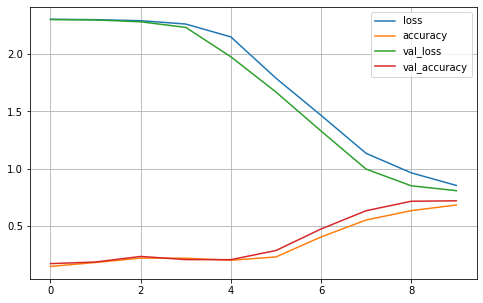

In [5]:
plot_learning_curves(history1)

**Update the model to add a BatchNormalization layer after every hidden layer**

In [6]:
model2 = keras.models.Sequential()
model2.add(keras.layers.Flatten(input_shape=[28, 28]))
for _ in range(20):
    model2.add(keras.layers.Dense(100, activation="relu"))
    model2.add(keras.layers.BatchNormalization())
model2.add(keras.layers.Dense(10, activation="softmax"))
model2.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(1e-3),
               metrics=["accuracy"])
history2 = model2.fit(X_train_scaled, y_train, epochs=10,
                     validation_data=(X_valid_scaled, y_valid))

Epoch 1/10
1719/1719 [==============================] - 21s 10ms/step - loss: 2.0805 - accuracy: 0.3104 - val_loss: 1.1652 - val_accuracy: 0.6072
Epoch 2/10
1719/1719 [==============================] - 18s 10ms/step - loss: 1.1238 - accuracy: 0.6103 - val_loss: 0.7805 - val_accuracy: 0.7224
Epoch 3/10
1719/1719 [==============================] - 17s 10ms/step - loss: 0.9618 - accuracy: 0.6619 - val_loss: 0.7019 - val_accuracy: 0.7494
Epoch 4/10
1719/1719 [==============================] - 17s 10ms/step - loss: 0.8767 - accuracy: 0.6900 - val_loss: 0.6386 - val_accuracy: 0.7714
Epoch 5/10
1719/1719 [==============================] - 17s 10ms/step - loss: 0.8364 - accuracy: 0.7029 - val_loss: 0.6069 - val_accuracy: 0.7792
Epoch 6/10
1719/1719 [==============================] - 18s 10ms/step - loss: 0.7872 - accuracy: 0.7210 - val_loss: 0.5820 - val_accuracy: 0.7924
Epoch 7/10
1719/1719 [==============================] - 17s 10ms/step - loss: 0.7550 - accuracy: 0.7319 - val_loss: 0.5644 -

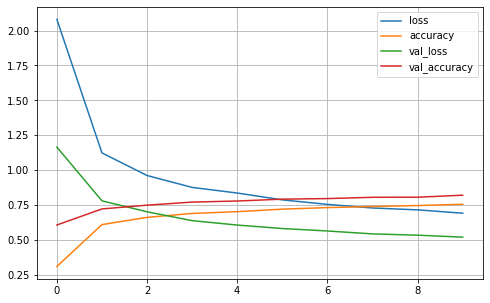

In [7]:
plot_learning_curves(history2)

**Move the BN layers before the hidden layers' activation functions**

In [8]:
model3 = keras.models.Sequential()
model3.add(keras.layers.Flatten(input_shape=[28, 28]))
for _ in range(20):
    model3.add(keras.layers.Dense(100))
    model3.add(keras.layers.BatchNormalization())
    model3.add(keras.layers.Activation("relu"))
model3.add(keras.layers.Dense(10, activation="softmax"))
model3.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(1e-3),
               metrics=["accuracy"])
history3 = model3.fit(X_train_scaled, y_train, epochs=10,
                     validation_data=(X_valid_scaled, y_valid))

Epoch 1/10
1719/1719 [==============================] - 21s 10ms/step - loss: 1.9863 - accuracy: 0.3109 - val_loss: 1.2031 - val_accuracy: 0.6144
Epoch 2/10
1719/1719 [==============================] - 18s 10ms/step - loss: 1.1371 - accuracy: 0.6225 - val_loss: 0.7713 - val_accuracy: 0.7380
Epoch 3/10
1719/1719 [==============================] - 18s 10ms/step - loss: 0.9327 - accuracy: 0.6848 - val_loss: 0.6697 - val_accuracy: 0.7658
Epoch 4/10
1719/1719 [==============================] - 18s 10ms/step - loss: 0.8483 - accuracy: 0.7106 - val_loss: 0.6179 - val_accuracy: 0.7784
Epoch 5/10
1719/1719 [==============================] - 18s 10ms/step - loss: 0.7899 - accuracy: 0.7289 - val_loss: 0.5787 - val_accuracy: 0.7914
Epoch 6/10
1719/1719 [==============================] - 18s 10ms/step - loss: 0.7521 - accuracy: 0.7417 - val_loss: 0.5546 - val_accuracy: 0.7988
Epoch 7/10
1719/1719 [==============================] - 18s 10ms/step - loss: 0.7102 - accuracy: 0.7563 - val_loss: 0.5323 -

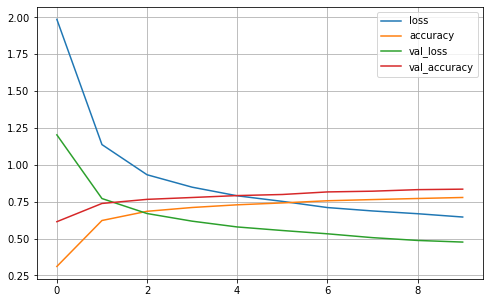

In [9]:
plot_learning_curves(history3)

**Remove all the BN layers, and just use the SELU activation function instead (always use SELU with LeCun Normal weight initialization)**

Notice that you get better performance than with BN but training is much faster.

In [10]:
model4 = keras.models.Sequential()
model4.add(keras.layers.Flatten(input_shape=[28, 28]))
for _ in range(20):
    model4.add(keras.layers.Dense(100, activation="selu",
                                  kernel_initializer="lecun_normal"))
model4.add(keras.layers.Dense(10, activation="softmax"))
model4.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(1e-3),
               metrics=["accuracy"])
history4 = model4.fit(X_train_scaled, y_train, epochs=10,
                     validation_data=(X_valid_scaled, y_valid))

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6723 - accuracy: 0.7668 - val_loss: 0.4957 - val_accuracy: 0.8240
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4525 - accuracy: 0.8375 - val_loss: 0.4374 - val_accuracy: 0.8476
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4019 - accuracy: 0.8550 - val_loss: 0.4160 - val_accuracy: 0.8512
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3710 - accuracy: 0.8669 - val_loss: 0.3970 - val_accuracy: 0.8564
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3482 - accuracy: 0.8738 - val_loss: 0.3870 - val_accuracy: 0.8608
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3310 - accuracy: 0.8798 - val_loss: 0.3814 - val_accuracy: 0.8628
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3158 - accuracy: 0.8857 - val_loss: 0.3763 - val_accuracy:

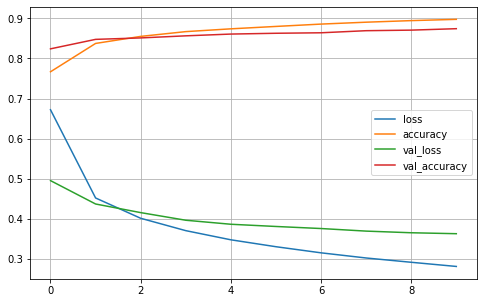

In [11]:
plot_learning_curves(history4)

**Train for 10 additional epochs** 

Notice that the model starts overfitting

In [12]:
history5 = model4.fit(X_train_scaled, y_train, epochs=10,
                     validation_data=(X_valid_scaled, y_valid))

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2722 - accuracy: 0.9013 - val_loss: 0.3578 - val_accuracy: 0.8740
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2640 - accuracy: 0.9043 - val_loss: 0.3517 - val_accuracy: 0.8796
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2560 - accuracy: 0.9072 - val_loss: 0.3560 - val_accuracy: 0.8742
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2476 - accuracy: 0.9104 - val_loss: 0.3565 - val_accuracy: 0.8770
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2408 - accuracy: 0.9139 - val_loss: 0.3508 - val_accuracy: 0.8800
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2327 - accuracy: 0.9163 - val_loss: 0.3524 - val_accuracy: 0.8804
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2268 - accuracy: 0.9182 - val_loss: 0.3581 - val_accuracy:

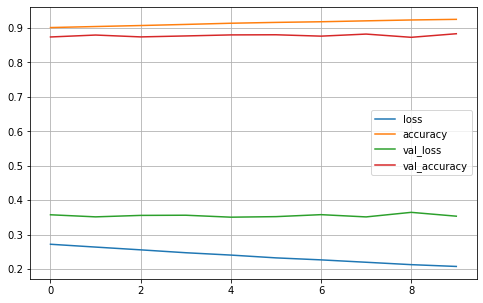

In [13]:
plot_learning_curves(history5)

**Add a Dropout layer (with a 50% dropout rate) just before the output layer to reduce overfitting**

In [14]:
model5 = keras.models.Sequential()
model5.add(keras.layers.Flatten(input_shape=[28, 28]))
for _ in range(20):
    model5.add(keras.layers.Dense(100, activation="selu",
                                  kernel_initializer="lecun_normal"))
model5.add(keras.layers.AlphaDropout(rate=0.5))
model5.add(keras.layers.Dense(10, activation="softmax"))
model5.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(1e-3),
               metrics=["accuracy"])
history6 = model5.fit(X_train_scaled, y_train, epochs=20,
                     validation_data=(X_valid_scaled, y_valid))

Epoch 1/20
1719/1719 [==============================] - 6s 3ms/step - loss: 1.1293 - accuracy: 0.6308 - val_loss: 0.7939 - val_accuracy: 0.8136
Epoch 2/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6758 - accuracy: 0.7875 - val_loss: 0.7372 - val_accuracy: 0.8394
Epoch 3/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5641 - accuracy: 0.8217 - val_loss: 0.6772 - val_accuracy: 0.8488
Epoch 4/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5047 - accuracy: 0.8385 - val_loss: 0.6181 - val_accuracy: 0.8626
Epoch 5/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4634 - accuracy: 0.8510 - val_loss: 0.6159 - val_accuracy: 0.8654
Epoch 6/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4336 - accuracy: 0.8603 - val_loss: 0.6083 - val_accuracy: 0.8650
Epoch 7/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4097 - accuracy: 0.8666 - val_loss: 0.5875 - val_accuracy:

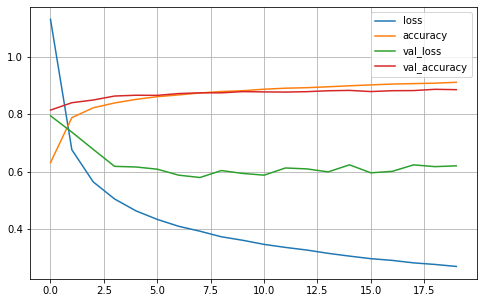

In [15]:
plot_learning_curves(history6)